In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
student_data = pd.read_csv('/content/drive/MyDrive/The Spark Foundation_Internship/student_scores.csv')
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
print(student_data.shape)
student_data.describe()

(25, 2)


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


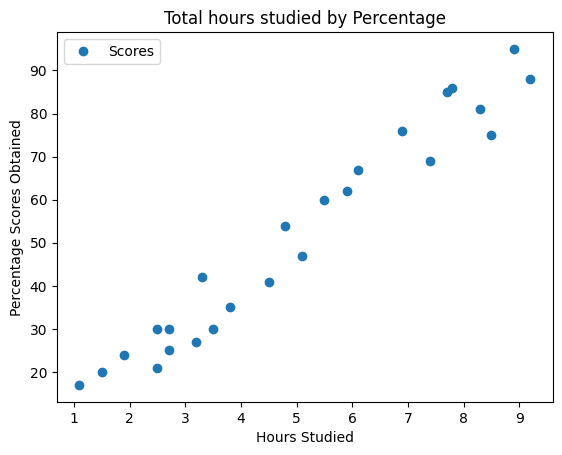

In [5]:
student_data.plot(x='Hours', y='Scores', style='o')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores Obtained')
plt.title('Total hours studied by Percentage')
plt.show()

In [6]:
X = student_data.iloc[:, :-1].values
y = student_data.iloc[:, 1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("Training...")

Training...


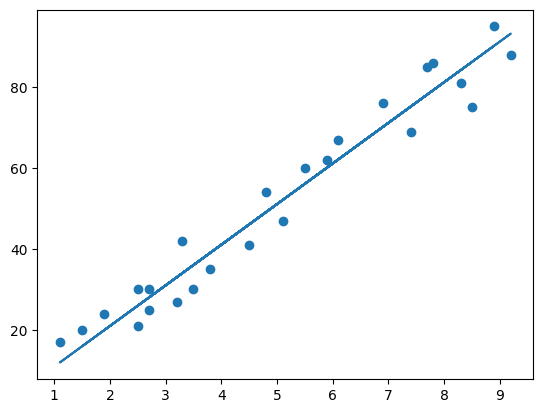

In [9]:
regression_line = model.coef_ * X + model.intercept_
plt.scatter(X, y)
plt.plot(X, regression_line);
plt.show()

In [10]:
print(X_test)
y_pred = model.predict(X_test)

[[3.3]
 [4.5]
 [5.9]
 [8.3]
 [1.1]]


In [11]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,42,34.036883
1,41,46.078729
2,62,60.127548
3,81,84.211239
4,17,11.960167


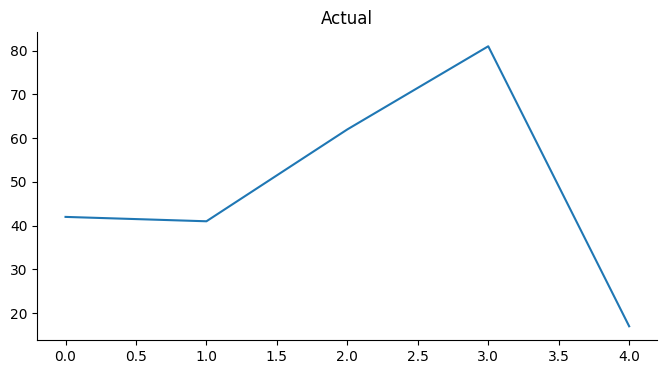

In [12]:
# @title Actual

from matplotlib import pyplot as plt
df['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

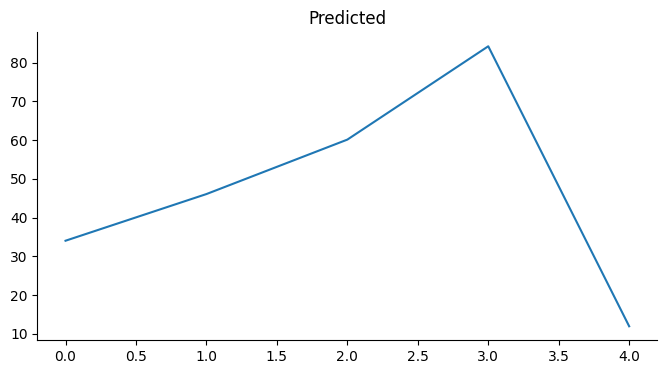

In [13]:
# @title Predicted

from matplotlib import pyplot as plt
df['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
hours = 9.25
hours_2d = np.array(hours).reshape(1, -1)
predicted_score = model.predict(hours_2d)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predicted_score[0]))

No of Hours = 9.25
Predicted Score = 93.7443660480047


In [15]:
from sklearn import metrics
absolute_error = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', absolute_error )

Mean Absolute Error: 4.6330737017060715


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print(f'MSE (Mean Squared Error): {mse}')


MSE (Mean Squared Error): 25.684550860065002


In [25]:
r2 = r2_score(y_test, y_pred)

# Convert R2 score to percentage
r2_percentage = r2 * 100

print(f'R2 Score: {r2_percentage:.2f}%')

R2 Score: 94.49%
